In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime

In [2]:
# !rm useful_files.txt
# !grep -r ../backend/data/ -Le synthetic > useful_files.txt

In [3]:
with open("useful_files.txt") as f:
    files = f.readlines()
files = [x for x in files if "txt"not in x]

In [4]:
df = pd.DataFrame(files, columns=["filenames"])

In [5]:
df["file_content"]=df.filenames.map(lambda x: Path(x.strip()).read_text() )

In [6]:
df["timestamp"] = df.filenames.map(lambda x: int(x.split(".")[2].split("/")[3].replace("get_bs_score-","")))

In [7]:
df["datetime"] = df.timestamp.map(lambda x: datetime.fromtimestamp(x))

<Axes: >

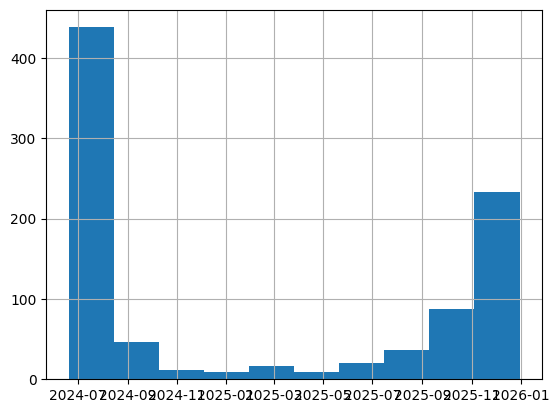

In [8]:
df.datetime.hist()

In [22]:
import json
import ast
def get_json_data(t):
    try:
        value = t.split('\n')[0]
        bytes_value = ast.literal_eval(value)
        json_str = bytes_value.decode("utf-8")
        return json.loads(json_str)

    except Exception as e:
        if t.startswith('text='):
            return {"text":value}
        else:
            return {"error":t}
        print (f"could not process {t} because {e}")
        return {}

# get_json_data("""b'{"type":"bs-exonerate","data":{"query":"safdjkfsdajklafjklalkjadfs\\n"}}'""")

In [28]:
df['json_data'] = df.file_content.apply( get_json_data )
def extract_data(df, value_name):
    df[value_name] = df.json_data.apply( lambda x: x[value_name] if value_name in x else None)
extract_data(df, "error")
extract_data(df, "type")
extract_data(df, "value")

<coroutine object Request.body at 0x7b4b8a4ec4a0> 

 127.0.0.1 

 Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:127.0) Gecko/20100101 Firefox/127.0


In [42]:
df[~df.error.isna()]

,filenames,file_content,timestamp,datetime,error,type,value,json_data
433,../backend/data/1719058047.314777cb9434c1-b43d...,<coroutine object Request.body at 0x7b4b8a4ec4...,1719058047,2024-06-22 14:07:27,<coroutine object Request.body at 0x7b4b8a4ec4...,None,None,{'error': '<coroutine object Request.body at 0...


<Axes: >

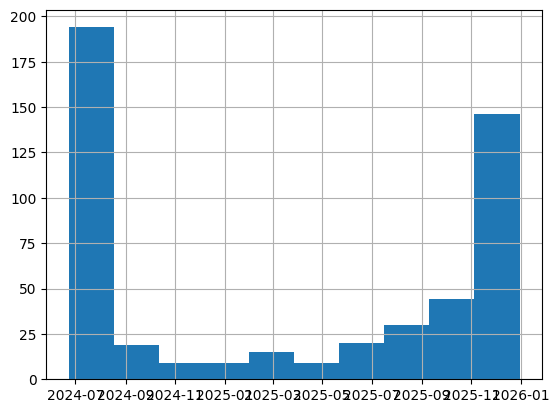

In [47]:
df[df.type == "page-view"].datetime.hist()

In [ ]:
df[df.type == "page-view"].datetime.hist()

In [53]:
types = list(df.type.drop_duplicates())

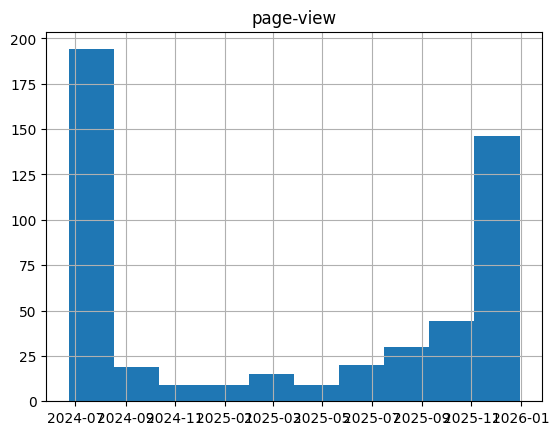

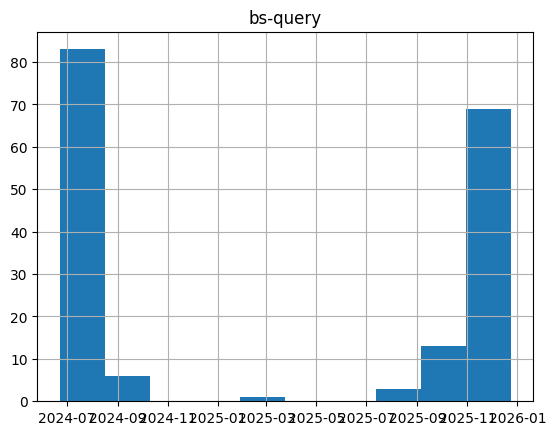

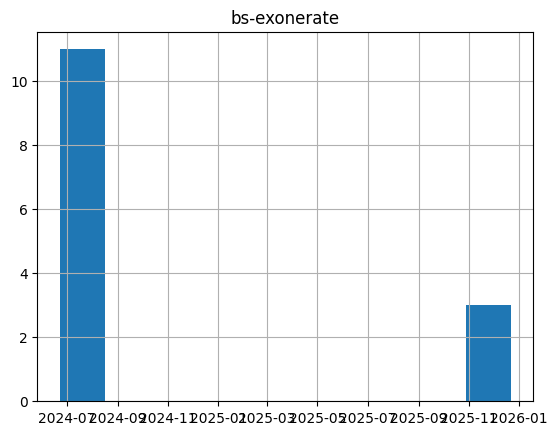

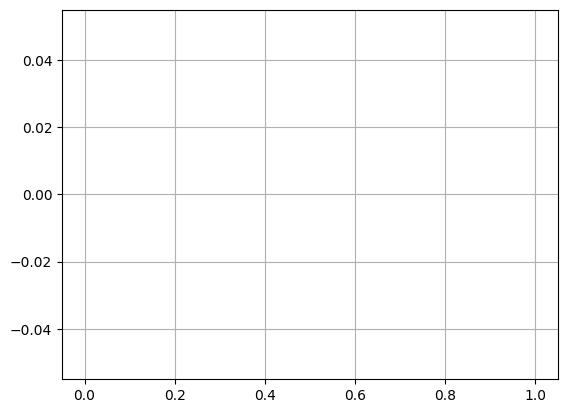

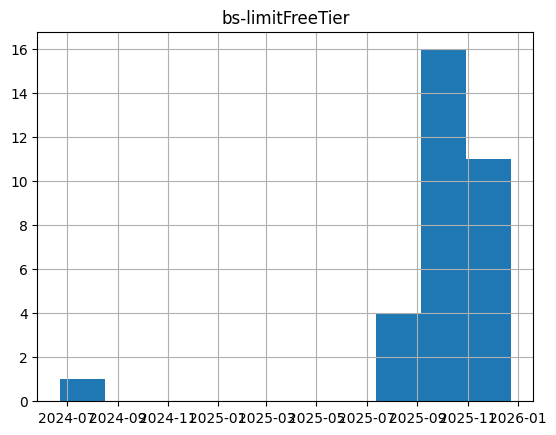

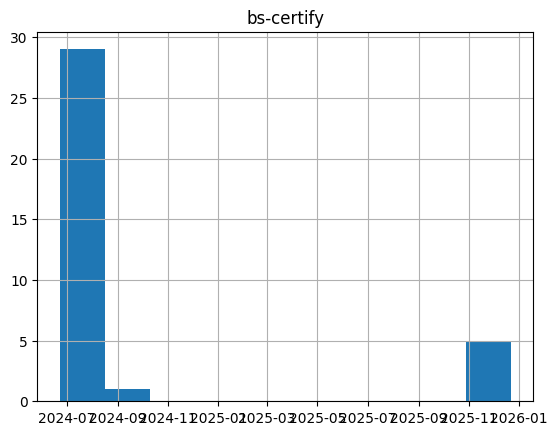

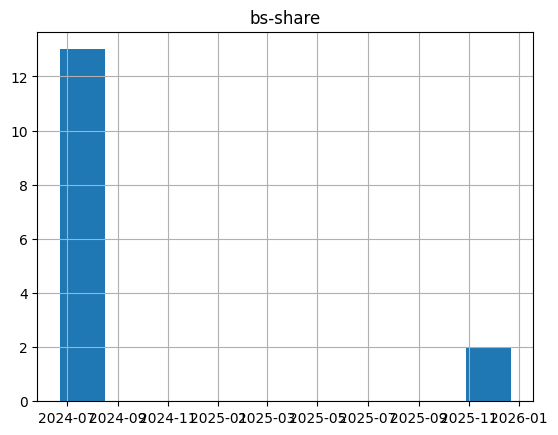

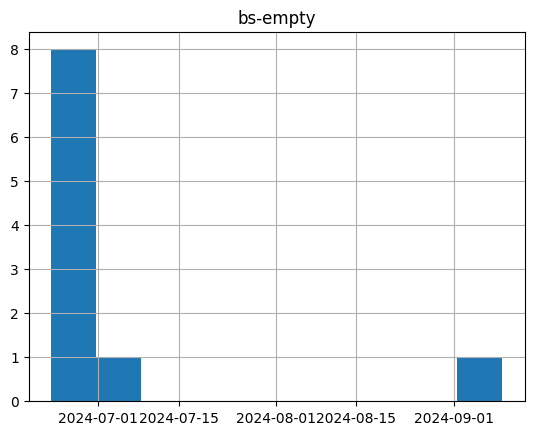

In [64]:
import matplotlib.pyplot as plt 
for t in types:
    plt.figure()
    plt.title(t)
    df[df.type == t].datetime.hist()

In [65]:
df[df.type=='bs-share']


,filenames,file_content,timestamp,datetime,error,type,value,json_data
81,../backend/data/1764254345.568531c993267a-85c3...,"b'{""type"":""bs-share"",""data"":null}' \n\n 83.42....",1764254345,2025-11-27 15:39:05,None,bs-share,None,"{'type': 'bs-share', 'data': None}"
112,../backend/data/1720176947.823539926c0c13-964a...,"b'{""type"":""bs-share"",""data"":null}' \n\n 188.84...",1720176947,2024-07-05 12:55:47,None,bs-share,None,"{'type': 'bs-share', 'data': None}"
139,../backend/data/1766332276.0722919705539-a3af-...,"b'{""type"":""bs-share"",""data"":null}' \n\n 112.13...",1766332276,2025-12-21 16:51:16,None,bs-share,None,"{'type': 'bs-share', 'data': None}"
288,../backend/data/1720428808.805223d2028c71-ea00...,"b'{""type"":""bs-share"",""data"":null}' \n\n 188.84...",1720428808,2024-07-08 10:53:28,None,bs-share,None,"{'type': 'bs-share', 'data': None}"
332,../backend/data/1720428807.790063d2028c71-ea00...,"b'{""type"":""bs-share"",""data"":null}' \n\n 188.84...",1720428807,2024-07-08 10:53:27,None,bs-share,None,"{'type': 'bs-share', 'data': None}"
360,../backend/data/1719067210.068779c440cd7b-0938...,"b'{""type"":""bs-share"",""data"":null}' \n\n 127.0....",1719067210,2024-06-22 16:40:10,None,bs-share,None,"{'type': 'bs-share', 'data': None}"
397,../backend/data/1719079283.5958184dc50a52-f72f...,"b'{""type"":""bs-share"",""data"":null}' \n\n 127.0....",1719079283,2024-06-22 20:01:23,None,bs-share,None,"{'type': 'bs-share', 'data': None}"
471,../backend/data/1719068746.12481998a14342-fa4c...,"b'{""type"":""bs-share"",""data"":null}' \n\n 127.0....",1719068746,2024-06-22 17:05:46,None,bs-share,None,"{'type': 'bs-share', 'data': None}"
507,../backend/data/1719325770.234971926c0c13-964a...,"b'{""type"":""bs-share"",""data"":null}' \n\n 62.57....",1719325770,2024-06-25 16:29:30,None,bs-share,None,"{'type': 'bs-share', 'data': None}"
575,../backend/data/1719079282.6954334dc50a52-f72f...,"b'{""type"":""bs-share"",""data"":null}' \n\n 127.0....",1719079282,2024-06-22 20:01:22,None,bs-share,None,"{'type': 'bs-share', 'data': None}"
